In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\kuyub\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('dataset/tweets_labelled.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df

,tweets,sentiment
0,"['wajib', 'scan', 'qr', 'wajib', 'vaksin', 'bo...",-1.0
1,"['moga', 'pink', 'balik', 'kai', 'pakai', 'vak...",-1.0
2,"['ready', 'tembak', 'vaksin', 'vaksin', 'hapus...",-1.0
3,"['informasi', 'medan', 'vaksin', 'booster']",1.0
4,"['takut', 'vaksin', 'booster']",1.0
...,...,...
5916,"['teman', 'vaksin', 'booster', 'gausah', 'tes'...",-1.0
5917,"['relokasi', 'vaksin', 'booster', 'atas', 'bat...",-1.0
5918,"['ceci', 'christele', 'plastic', 'girl', 'unai...",-1.0
5919,"['tidakapa-apa', 'vaksin', 'booster', 'pokok']",1.0


In [5]:
df.isna().sum()

tweets       0
sentiment    0
dtype: int64

In [5]:
# Membagi set data latih dan data uji dengan rasio 70:30
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(df['tweets'], df['sentiment'], 
                                                                    test_size=0.3, random_state=42)

In [4]:
print(X_Train.size, X_Train.size/(X_Test.size+X_Train.size),'%','\n',
      X_Test.size, X_Test.size/(X_Test.size+X_Train.size),'%')

4144 0.6998817767269042 % 
 1777 0.3001182232730958 %


In [10]:
data_train = pd.DataFrame()
data_train['tweets'] = X_Train
data_train['sentiment'] = Y_Train

data_test = pd.DataFrame()
data_test['tweets'] = X_Test
data_test['sentiment'] = Y_Test

In [9]:
data_train

,tweets,sentiment
229,"['kunci', 'utama', 'tekan', 'covid', 'indonesi...",1.0
4127,"['aplikasi', 'kaiaccess', 'sistem', 'boarding'...",1.0
668,"['izin', 'desember', 'layan', 'vaksin', 'boost...",-1.0
218,"['ada', 'vaksin', 'booster', 'calon', 'tumpang...",1.0
4940,"['cari', 'vaksin', 'booster', 'daerah', 'malang']",-1.0
...,...,...
3772,"['vaksin', 'booster', 'tertawa']",1.0
5191,"['drop', 'informasi', 'vaksin', 'booster', 'da...",1.0
5226,"['vaksin', 'booster', 'kayak', 'travelling', '...",1.0
5390,"['holding', 'bumn', 'farmasi', 'harap', 'indov...",-1.0


In [116]:
data_train.to_excel('dataset/data_train.xlsx')

In [10]:
data_test

,tweets,sentiment
4794,"['informasi', 'vaksin', 'booster', 'dom', 'tan...",1.0
1268,"['anuar', 'ibrahim', 'rompak', 'rm', 'billion'...",-1.0
4076,"['gais', 'nonton', 'konser', 'besok', 'vaksin'...",1.0
5058,"['maaf', 'vaksin', 'tiga', 'kenan', 'kakak', '...",1.0
4004,"['takut', 'vaksin', 'booster']",1.0
...,...,...
5067,"['dok', 'vaksin', 'booster']",1.0
3501,"['informasi', 'vaksin', 'booster', 'bsd']",1.0
949,"['bijak', 'wajib', 'vaksin', 'booster', 'serti...",1.0
4816,"['informasi', 'vaksin', 'booster', 'daerah', '...",1.0


In [117]:
data_test.to_excel('dataset/data_test.xlsx')

<h1>TF-IDF</h1>

In [6]:
Tfidf = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, 
                    use_idf=True).fit(df['tweets'])

X = Tfidf.fit_transform(df['tweets'])

# Transform X_Train dan X_Test ke vektor TF-IDF
Train_X_Tfidf = Tfidf.transform(X_Train)
Test_X_Tfidf = Tfidf.transform(X_Test)

In [10]:
df_Tfidf = pd.DataFrame(X.todense().T,
                       index=Tfidf.get_feature_names_out(),
                       columns=[f'D{i+1}' for i in range(len(df['tweets']))])
df_Tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D5912,D5913,D5914,D5915,D5916,D5917,D5918,D5919,D5920,D5921
aamiin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
abang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
absen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.293341,0.0,0.0,0.0,0.0,0.0
acara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.270546,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xbb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
xxb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
yaallah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
yak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [20]:
df_Tfidf.to_excel('output/tfidf_transform.xlsx')

In [115]:
# print 16 nama fitur pertama dan terakhir
print(Tfidf.get_feature_names_out()[:16],'\n',
       Tfidf.get_feature_names_out()[-16:])

# print 16 vektor TF-IDF pertama dan terakhir untuk 6 baris/kalimat
with np.printoptions(edgeitems=16):
     print(X.toarray()[:16])

# print(Tfidf.vocabulary_)
import reprlib
print(reprlib.repr(Tfidf.vocabulary_))

# # Jika kita ingin melihat vektor dari suatu kata:
# # sebagai contoh kata di array[22]:
val = list(Tfidf.vocabulary_)[22]
print(val)

['aamiin' 'abai' 'abang' 'absen' 'acara' 'access' 'aceh' 'ada' 'adain'
 'adek' 'adik' 'admin' 'after' 'agama' 'agustus' 'aipda'] 
 ['waspada' 'wbp' 'web' 'wes' 'wib' 'wilayah' 'wisuda' 'wkwkwkwk' 'work'
 'wta' 'wujud' 'xbb' 'xxb' 'yaallah' 'yak' 'yogyakarta']
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         ... 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         ... 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.       

In [21]:
print(Train_X_Tfidf)

  (0, 1200)	0.45330337476995436
  (0, 1123)	0.33393800835145165
  (0, 1103)	0.4509385078814395
  (0, 983)	0.2597783240178051
  (0, 892)	0.31540553229279306
  (0, 592)	0.39219457691044796
  (0, 420)	0.33348008949089675
  (0, 221)	0.21832300711302755
  (1, 1172)	0.20415704931633583
  (1, 1122)	0.2803868923719286
  (1, 1051)	0.19094024442232188
  (1, 1034)	0.316278218348952
  (1, 835)	0.22686327068759313
  (1, 738)	0.2345018173867441
  (1, 634)	0.20092520580102585
  (1, 537)	0.325238583359218
  (1, 493)	0.19606278276106864
  (1, 460)	0.21640894390057047
  (1, 156)	0.5355055736700508
  (1, 131)	0.23358791951318641
  (1, 64)	0.2529839910421197
  (2, 1128)	0.2704213520641716
  (2, 1112)	0.41801015592604635
  (2, 1077)	0.2680156354923206
  (2, 616)	0.3071343460112473
  :	:
  (4140, 998)	0.425010338974374
  (4140, 698)	0.38661478744495564
  (4140, 424)	0.17066711681462543
  (4140, 403)	0.41591286973482466
  (4140, 291)	0.4489395642807959
  (4140, 231)	0.2613812155558894
  (4141, 519)	0.5917078

In [8]:
Train_X_Tfidf.shape

(4144, 1237)

In [15]:
print(Test_X_Tfidf)

  (0, 7640)	0.33610733612464844
  (0, 7416)	0.3134461422533679
  (0, 7307)	0.08215927147501251
  (0, 6949)	0.217954543338645
  (0, 6871)	0.1655405970084348
  (0, 6861)	0.2990028755909977
  (0, 5948)	0.24944706800163247
  (0, 5141)	0.19905915852283454
  (0, 3780)	0.17630003425215932
  (0, 3037)	0.26355146908473365
  (0, 2668)	0.11710286708242498
  (0, 2514)	0.2709344347452705
  (0, 2463)	0.2951433660685436
  (0, 1940)	0.2730115156880745
  (0, 1332)	0.4060435009897589
  (0, 889)	0.04121166327751923
  (1, 7413)	0.29987429264395044
  (1, 7307)	0.0637251815022809
  (1, 6651)	0.25451194215845296
  (1, 6505)	0.32175388098170593
  (1, 5011)	0.5213897497936181
  (1, 2839)	0.26551774080098073
  (1, 2320)	0.2626441120672041
  (1, 1570)	0.38164552921212513
  (1, 1025)	0.4202896573787472
  :	:
  (1183, 5630)	0.27695491719357146
  (1183, 5572)	0.21768589739858854
  (1183, 5488)	0.18952635979801793
  (1183, 5111)	0.24691536832395117
  (1183, 3332)	0.2695918483362563
  (1183, 3261)	0.29452692682088
  

In [9]:
Test_X_Tfidf.shape

(1777, 1237)

In [30]:
# fitting data latih pada classifier
SVM = SVC(kernel='linear', random_state=42)
SVM.fit(Train_X_Tfidf, Y_Train)

# memprediksi label pada set data uji
predictions_SVM_Tfidf = SVM.predict(Test_X_Tfidf)

# Menggunakan fungsi accuracy_score untuk mendapat nilai akurasi
acc_tfidf = accuracy_score(Y_Test, predictions_SVM_Tfidf)*100
print('SVM Accuracy Score -> ', acc_tfidf)

cross_val_score(SVM, Train_X_Tfidf, Y_Train, cv=10)

SVM Accuracy Score ->  91.33370849746765


array([0.9253012 , 0.90120482, 0.89638554, 0.89156627, 0.90096618,
       0.88405797, 0.88164251, 0.91545894, 0.89855072, 0.88647343])

In [31]:
cross_val_score(SVM, Train_X_Tfidf, Y_Train, cv=10).mean()

0.8981607589779408

<h1>Membandingkan Kernel</h1>
<h2>1. Linear</h2>

In [7]:
SVM = SVC()
linear = SVC(kernel='linear', C=2.33, gamma=0.0001)
linear.fit(Train_X_Tfidf, Y_Train)
linear1 = linear.predict(Test_X_Tfidf)

In [19]:
# validasi data training
scores = cross_val_score(linear, Train_X_Tfidf, Y_Train, cv=8)
print(scores)
print("K-Fold Mean -> ", cross_val_score(linear, Train_X_Tfidf, Y_Train, cv=8).mean())

[0.91119691 0.91312741 0.91891892 0.90926641 0.88416988 0.91891892
 0.8996139  0.9015444 ]
K-Fold Mean ->  0.9070945945945945


In [49]:
# validasi data testing
scores2 = cross_val_score(linear, Test_X_Tfidf, Y_Test, cv=10)
print(scores2)
print("K-Fold Mean -> ", cross_val_score(linear, Test_X_Tfidf, Y_Test, cv=10).mean())

[0.91011236 0.84831461 0.85955056 0.86516854 0.87640449 0.88202247
 0.85955056 0.88135593 0.86440678 0.8700565 ]
K-Fold Mean ->  0.8716942804545166


In [12]:
y_true = Y_Test # y_true untuk semua percobaan kernel 
y_pred = linear.predict(Test_X_Tfidf)

In [13]:
df_pred = data_test.assign(predict_sentiment = y_pred)
df_pred

,tweets,sentiment,predict_sentiment
4794,"['informasi', 'vaksin', 'booster', 'dom', 'tan...",1.0,1.0
1268,"['anuar', 'ibrahim', 'rompak', 'rm', 'billion'...",-1.0,1.0
4076,"['gais', 'nonton', 'konser', 'besok', 'vaksin'...",1.0,1.0
5058,"['maaf', 'vaksin', 'tiga', 'kenan', 'kakak', '...",1.0,1.0
4004,"['takut', 'vaksin', 'booster']",1.0,1.0
...,...,...,...
5067,"['dok', 'vaksin', 'booster']",1.0,1.0
3501,"['informasi', 'vaksin', 'booster', 'bsd']",1.0,1.0
949,"['bijak', 'wajib', 'vaksin', 'booster', 'serti...",1.0,-1.0
4816,"['informasi', 'vaksin', 'booster', 'daerah', '...",1.0,1.0


In [16]:
df_pred.to_csv('output/predict_svm_linear.csv')
df_pred.to_excel('output/predict_svm_linear.xlsx')

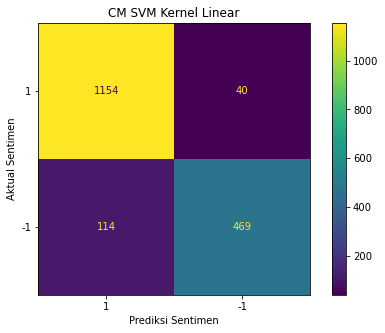

True Positive :  1154
True Negative :  469
False Positive :  114
False Negative  :  40


SVM Accuracy Score ->  91.33370849746765
SVM Precision Score ->  96.64991624790619
SVM Recall Score ->  91.00946372239747
SVM f1 Score ->  93.74492282696994


In [12]:
# visualisasi Confusion Matrix
label = [-1,1]
cm = metrics.confusion_matrix(y_true, y_pred, labels=label)

# plotting
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
fig, ax = plt.subplots(figsize=(8,5))
cm_display.plot(ax=ax)
plt.title("CM SVM Kernel Linear")
ax.set_xlabel("Prediksi Sentimen")
ax.set_ylabel("Aktual Sentimen")

# pembalikan urutan label sentiment
ax.invert_xaxis()
ax.invert_yaxis()

plt.savefig('output/plot_cm_svm_kernel_linear.png')
plt.show()
# -1 = negatif, 1 = positif

# Confusion matrix SVM Linear
tn, fp, fn, tp = confusion_matrix(y_true, linear1).ravel()
print("True Positive : ", tp)
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative  : ", fn)
print("\n")

# classification report (nilai akurasi, presisi, recall, f1-score)
print("SVM Accuracy Score -> ", accuracy_score(y_pred, y_true)*100)
print("SVM Precision Score -> ", precision_score(y_pred, y_true)*100)
print("SVM Recall Score -> ", recall_score(y_pred, y_true)*100)
print("SVM f1 Score -> ", f1_score(y_pred, y_true)*100)

<h2>2. Polynomial</h2>

In [13]:
poly = SVC(kernel='poly', C=2.33)
poly.fit(Train_X_Tfidf, Y_Train)
poly1 = poly.predict(Test_X_Tfidf)

In [20]:
scores = cross_val_score(poly, Train_X_Tfidf, Y_Train, cv=8)
print(scores)
print("K-Fold Mean -> ", cross_val_score(poly, Train_X_Tfidf, Y_Train, cv=8).mean())

[0.83783784 0.81274131 0.82625483 0.82818533 0.82046332 0.82432432
 0.81081081 0.80501931]
K-Fold Mean ->  0.8207046332046333


In [10]:
y_pred = poly.predict(Test_X_Tfidf)

In [11]:
df_pred = data_test.assign(predict_sentiment = y_pred)
df_pred

,tweets,sentiment,predict_sentiment
4794,"['informasi', 'vaksin', 'booster', 'dom', 'tan...",1.0,1.0
1268,"['anuar', 'ibrahim', 'rompak', 'rm', 'billion'...",-1.0,1.0
4076,"['gais', 'nonton', 'konser', 'besok', 'vaksin'...",1.0,1.0
5058,"['maaf', 'vaksin', 'tiga', 'kenan', 'kakak', '...",1.0,1.0
4004,"['takut', 'vaksin', 'booster']",1.0,1.0
...,...,...,...
5067,"['dok', 'vaksin', 'booster']",1.0,1.0
3501,"['informasi', 'vaksin', 'booster', 'bsd']",1.0,1.0
949,"['bijak', 'wajib', 'vaksin', 'booster', 'serti...",1.0,1.0
4816,"['informasi', 'vaksin', 'booster', 'daerah', '...",1.0,1.0


In [12]:
df_pred.to_csv('output/predict_svm_poly.csv')
df_pred.to_excel('output/predict_svm_poly.xlsx')

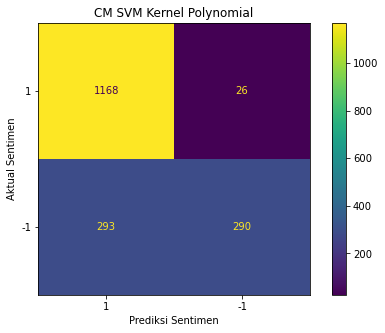

True Positive :  1168
True Negative :  290
False Positive :  293
False Negative  :  26


SVM Accuracy Score ->  82.04839617332583
SVM Recall Score ->  79.94524298425736
SVM Precision Score ->  97.82244556113902
SVM f1 Score ->  87.984934086629


In [92]:
# visualisasi Confusion Matrix
label = [-1,1]
cm = metrics.confusion_matrix(y_true, y_pred, labels=label)

# plotting
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
fig, ax = plt.subplots(figsize=(8,5))
cm_display.plot(ax=ax)
plt.title("CM SVM Kernel Polynomial")
ax.set_xlabel("Prediksi Sentimen")
ax.set_ylabel("Aktual Sentimen")

# pembalikan urutan label sentiment
ax.invert_xaxis()
ax.invert_yaxis()

plt.savefig('output/plot_cm_svm_kernel_poly.png')
plt.show()
# -1 = negatif, 1 = positif

# Confusion matrix SVM Poly
tn, fp, fn, tp = confusion_matrix(Y_Test, poly1).ravel()
print("True Positive : ", tp)
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative  : ", fn)
print("\n")

# classification report (nilai akurasi, presisi, recall, f1-score)
print("SVM Accuracy Score -> ", accuracy_score(y_pred, y_true)*100)
print("SVM Recall Score -> ", recall_score(y_pred, y_true)*100)
print("SVM Precision Score -> ", precision_score(y_pred, y_true)*100)
print("SVM f1 Score -> ", f1_score(y_pred, y_true)*100)

<h2>3. Radial Basis Function (RBF, Gaussian)</h2>

In [15]:
rbf = SVC(kernel='rbf', C=2.13, gamma=0.50)
rbf.fit(Train_X_Tfidf, Y_Train)
rbf1 = rbf.predict(Test_X_Tfidf)

In [21]:
scores = cross_val_score(rbf, Train_X_Tfidf, Y_Train, cv=8)
print(scores)
print("K-Fold Mean -> ", cross_val_score(rbf, Train_X_Tfidf, Y_Train, cv=8).mean())

[0.91698842 0.91312741 0.90733591 0.90926641 0.88223938 0.90733591
 0.8996139  0.88803089]
K-Fold Mean ->  0.9029922779922779


In [27]:
y_pred = rbf.predict(Test_X_Tfidf)

In [28]:
df_pred = data_test.assign(predict_sentiment = y_pred)
df_pred

,tweets,sentiment,predict_sentiment
4794,"['informasi', 'vaksin', 'booster', 'dom', 'tan...",1.0,1.0
1268,"['anuar', 'ibrahim', 'rompak', 'rm', 'billion'...",-1.0,1.0
4076,"['gais', 'nonton', 'konser', 'besok', 'vaksin'...",1.0,1.0
5058,"['maaf', 'vaksin', 'tiga', 'kenan', 'kakak', '...",1.0,1.0
4004,"['takut', 'vaksin', 'booster']",1.0,1.0
...,...,...,...
5067,"['dok', 'vaksin', 'booster']",1.0,1.0
3501,"['informasi', 'vaksin', 'booster', 'bsd']",1.0,1.0
949,"['bijak', 'wajib', 'vaksin', 'booster', 'serti...",1.0,-1.0
4816,"['informasi', 'vaksin', 'booster', 'daerah', '...",1.0,1.0


In [16]:
df_pred.to_csv('output/predict_svm_rbf.csv')
df_pred.to_excel('output/predict_svm_rbf.xlsx')

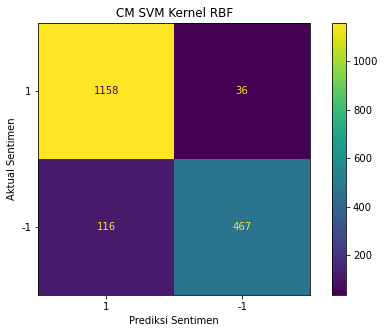

True Positive :  1158
True Negative :  467
False Positive :  116
False Negative  :  36


SVM Accuracy Score ->  91.44625773776028
SVM Recall Score ->  90.89481946624804
SVM Precision Score ->  96.98492462311557
SVM f1 Score ->  93.84116693679093


In [29]:
# visualisasi Confusion Matrix
label = [-1,1]
cm = metrics.confusion_matrix(y_true, y_pred, labels=label)

# plotting
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
fig, ax = plt.subplots(figsize=(8,5))
cm_display.plot(ax=ax)
plt.title("CM SVM Kernel RBF")
ax.set_xlabel("Prediksi Sentimen")
ax.set_ylabel("Aktual Sentimen")

# pembalikan urutan label sentiment
ax.invert_xaxis()
ax.invert_yaxis()

plt.savefig('output/plot_cm_svm_kernel_rbf.png')
plt.show()
# -1 = negatif, 1 = positif

# Confusion matrix SVM RBF
tn, fp, fn, tp = confusion_matrix(Y_Test, rbf1).ravel()
print("True Positive : ", tp)
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative  : ", fn)
print("\n")

# classification report (nilai akurasi, presisi, recall, f1-score)
print("SVM Accuracy Score -> ", accuracy_score(y_pred, y_true)*100)
print("SVM Recall Score -> ", recall_score(y_pred, y_true)*100)
print("SVM Precision Score -> ", precision_score(y_pred, y_true)*100)
print("SVM f1 Score -> ", f1_score(y_pred, y_true)*100)

<h2>4. Sigmoid</h2>

In [17]:
sig = SVC(kernel='sigmoid', C=2.25)
sig.fit(Train_X_Tfidf, Y_Train)
sig1 = sig.predict(Test_X_Tfidf)

In [22]:
scores = cross_val_score(sig, Train_X_Tfidf, Y_Train, cv=8)
print(scores)
print("K-Fold Mean -> ", cross_val_score(sig, Train_X_Tfidf, Y_Train, cv=8).mean())

[0.90926641 0.91119691 0.91505792 0.9015444  0.87837838 0.8976834
 0.88416988 0.88416988]
K-Fold Mean ->  0.8976833976833977


In [23]:
y_pred = sig.predict(Test_X_Tfidf)

In [24]:
df_pred = data_test.assign(predict_sentiment = y_pred)
df_pred

,tweets,sentiment,predict_sentiment
4794,"['informasi', 'vaksin', 'booster', 'dom', 'tan...",1.0,1.0
1268,"['anuar', 'ibrahim', 'rompak', 'rm', 'billion'...",-1.0,1.0
4076,"['gais', 'nonton', 'konser', 'besok', 'vaksin'...",1.0,1.0
5058,"['maaf', 'vaksin', 'tiga', 'kenan', 'kakak', '...",1.0,1.0
4004,"['takut', 'vaksin', 'booster']",1.0,1.0
...,...,...,...
5067,"['dok', 'vaksin', 'booster']",1.0,1.0
3501,"['informasi', 'vaksin', 'booster', 'bsd']",1.0,1.0
949,"['bijak', 'wajib', 'vaksin', 'booster', 'serti...",1.0,-1.0
4816,"['informasi', 'vaksin', 'booster', 'daerah', '...",1.0,1.0


In [25]:
df_pred.to_csv('output/predict_svm_sig.csv')
df_pred.to_excel('output/predict_svm_sig.xlsx')

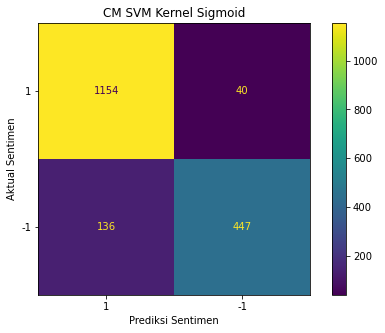

True Positive :  1154
True Negative :  447
False Positive :  136
False Negative  :  40


SVM Accuracy Score ->  90.09566685424873
SVM Recall Score ->  89.45736434108527
SVM Precision Score ->  96.64991624790619
SVM f1 Score ->  92.914653784219


In [102]:
# visualisasi Confusion Matrix
label = [-1,1]
cm = metrics.confusion_matrix(y_true, y_pred, labels=label)

# plotting
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
fig, ax = plt.subplots(figsize=(8,5))
cm_display.plot(ax=ax)
plt.title("CM SVM Kernel Sigmoid")
ax.set_xlabel("Prediksi Sentimen")
ax.set_ylabel("Aktual Sentimen")

# pembalikan urutan label sentiment
ax.invert_xaxis()
ax.invert_yaxis()

plt.savefig('output/plot_cm_svm_kernel_sigmoid.png')
plt.show()
# -1 = negatif, 1 = positif

# Confusion matrix SVM Sigmoid
tn, fp, fn, tp = confusion_matrix(Y_Test, sig1).ravel()
print("True Positive : ", tp)
print("True Negative : ", tn)
print("False Positive : ", fp)
print("False Negative  : ", fn)
print("\n")

# classification report (nilai akurasi, presisi, recall, f1-score)
print("SVM Accuracy Score -> ", accuracy_score(y_pred, y_true)*100)
print("SVM Recall Score -> ", recall_score(y_pred, y_true)*100)
print("SVM Precision Score -> ", precision_score(y_pred, y_true)*100)
print("SVM f1 Score -> ", f1_score(y_pred, y_true)*100)

In [105]:
#membangun model klasifikasi untuk prediksi kalimat sentimen
def classify(tweet):
    pred  = sig.predict(Tfidf.transform([tweet]))
    if pred == 1:
        return "Sentimen positif"
    return "Sentimen negatif"

In [106]:
classify('vaksin membuat badan lemes')

'Sentimen negatif'

In [107]:
classify('jangan lupa vaksin booster agar imun tetap terjaga')

'Sentimen positif'